# **Deep Learning Lab: Transfer Learning**

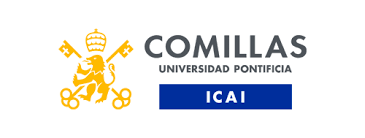

***

## Import packages

In [2]:
from cnn import CNN
import torchvision
from cnn import load_data
from cnn import load_model_weights
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import os
import json

## Model and data loading

In [3]:
# Pytorch has many pre-trained models that can be used for transfer learning
classification_models = torchvision.models.list_models(module=torchvision.models)

# Split the models randomly for 4 participants
np.random.shuffle(classification_models)
participants_models = np.array_split(classification_models, 3)



# Print the models assigned to each participant
for i, models in enumerate(participants_models):
    print(f"Participant {i+1} models: {models.tolist()}")


Participant 1 models: ['efficientnet_b3', 'wide_resnet50_2', 'swin_v2_b', 'vit_b_32', 'densenet201', 'regnet_x_16gf', 'shufflenet_v2_x1_5', 'vgg19_bn', 'vit_l_16', 'swin_s', 'efficientnet_b2', 'vit_h_14', 'swin_t', 'resnext101_64x4d', 'efficientnet_v2_l', 'wide_resnet101_2', 'convnext_large', 'resnet34', 'mnasnet1_3', 'efficientnet_v2_m', 'efficientnet_b0', 'convnext_tiny', 'inception_v3', 'shufflenet_v2_x1_0', 'regnet_x_32gf', 'vit_b_16', 'resnet101']
Participant 2 models: ['swin_b', 'regnet_y_16gf', 'regnet_y_128gf', 'swin_v2_s', 'regnet_y_32gf', 'vgg16', 'regnet_y_1_6gf', 'mnasnet0_75', 'vgg13', 'mobilenet_v3_large', 'swin_v2_t', 'regnet_x_800mf', 'regnet_x_3_2gf', 'vit_l_32', 'vgg11_bn', 'mobilenet_v3_small', 'squeezenet1_0', 'shufflenet_v2_x0_5', 'regnet_x_8gf', 'shufflenet_v2_x2_0', 'densenet161', 'mnasnet1_0', 'resnet50', 'squeezenet1_1', 'googlenet', 'resnext50_32x4d', 'alexnet']
Participant 3 models: ['regnet_x_1_6gf', 'regnet_y_400mf', 'efficientnet_b6', 'vgg19', 'efficientne

In [4]:
# Load data and model 

train_dir = './training'
valid_dir = './validation'

train_loader, valid_loader, num_classes = load_data(train_dir, 
                                                    valid_dir, 
                                                    batch_size=32, 
                                                    img_size=224) # ResNet50 requires 224x224 images

model = CNN(torchvision.models.resnet50(weights='DEFAULT'), num_classes, unfreezed_layers=4)
model2 = CNN(torchvision.models.resnet18(weights="DEFAULT"), num_classes, unfreezed_layers=2)
model3 = CNN(torchvision.models.efficientnet_v2_l(weights="DEFAULT"), num_classes, unfreezed_layers=2)

AttributeError: 'EfficientNet' object has no attribute 'fc'

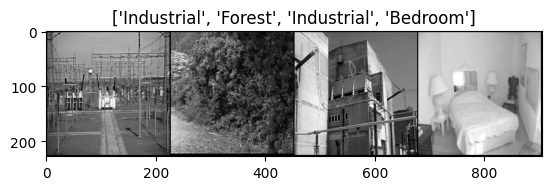

In [ ]:
# Visualize a few images
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

# Get a few random images
random_indices = np.random.choice(len(valid_loader.dataset), size=4, replace=False)
inputs = []
classes = []
for i in random_indices:
    inputs.append(valid_loader.dataset[i][0])
    classes.append(valid_loader.dataset[i][1])
out = torchvision.utils.make_grid(inputs)
classnames = train_loader.dataset.classes
imshow(out, title=[classnames[x] for x in classes])

In [6]:
classnames


['Bedroom',
 'Coast',
 'Forest',
 'Highway',
 'Industrial',
 'Inside city',
 'Kitchen',
 'Living room',
 'Mountain',
 'Office',
 'Open country',
 'Store',
 'Street',
 'Suburb',
 'Tall building']

## Train

In [17]:
optimizer = torch.optim.Adam(model.base_model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()
history = model.train_model(train_loader, valid_loader, optimizer, criterion, epochs=5)

Epoch 1/5 - Train Loss: 2.6640, Train Accuracy: 0.3950
Epoch 1/5 - Validation Loss: 2.4487, Validation Accuracy: 0.5480
Epoch 2/5 - Train Loss: 2.4390, Train Accuracy: 0.5598
Epoch 2/5 - Validation Loss: 2.3124, Validation Accuracy: 0.6540
Epoch 3/5 - Train Loss: 2.3003, Train Accuracy: 0.6157
Epoch 3/5 - Validation Loss: 2.2049, Validation Accuracy: 0.6680
Epoch 4/5 - Train Loss: 2.2427, Train Accuracy: 0.6342
Epoch 4/5 - Validation Loss: 2.1396, Validation Accuracy: 0.7227
Epoch 5/5 - Train Loss: 2.1873, Train Accuracy: 0.6804
Epoch 5/5 - Validation Loss: 2.1247, Validation Accuracy: 0.7220


In [18]:
model.save('resnet50-5epochV3')

In [9]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()
history = model2.train_model(train_loader, valid_loader, optimizer, criterion, epochs=5)

Epoch 1/5 - Train Loss: 2.7076, Train Accuracy: 0.0951
Epoch 1/5 - Validation Loss: 2.7069, Validation Accuracy: 0.0760
Epoch 2/5 - Train Loss: 2.7074, Train Accuracy: 0.0801
Epoch 2/5 - Validation Loss: 2.7069, Validation Accuracy: 0.0693
Epoch 3/5 - Train Loss: 2.7076, Train Accuracy: 0.0841
Epoch 3/5 - Validation Loss: 2.7068, Validation Accuracy: 0.0700
Epoch 4/5 - Train Loss: 2.7080, Train Accuracy: 0.0854
Epoch 4/5 - Validation Loss: 2.7070, Validation Accuracy: 0.0700
Epoch 5/5 - Train Loss: 2.7077, Train Accuracy: 0.0838
Epoch 5/5 - Validation Loss: 2.7068, Validation Accuracy: 0.0640


In [10]:
model2.save('convnext_small-5epoch')

In [14]:
model3 = CNN(torchvision.models.efficientnet_v2_l(weights="DEFAULT"), num_classes, unfreezed_layers=2)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()
history = model3.train_model(train_loader, valid_loader, optimizer, criterion, epochs=5)

Downloading: "https://download.pytorch.org/models/efficientnet_v2_l-59c71312.pth" to /home/ruiz/.cache/torch/hub/checkpoints/efficientnet_v2_l-59c71312.pth
100%|██████████| 455M/455M [00:11<00:00, 41.1MB/s] 


AttributeError: 'EfficientNet' object has no attribute 'fc'

In [ ]:
model3.save('efficientnet_v2_l-5epoch')

## Predict

#### Load model

In [11]:
# Load model
model_weights = load_model_weights('resnet34_finetuned.pt')
my_trained_model = CNN(torchvision.models.resnet50(weights='DEFAULT'), num_classes)
my_trained_model.load_state_dict(model_weights)

<All keys matched successfully>

## Results

In [12]:
predicted_labels = my_trained_model.predict(valid_loader)

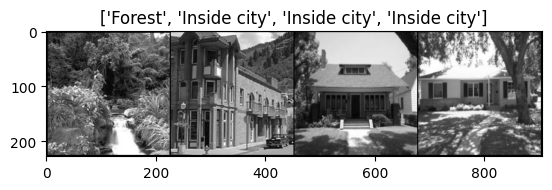

In [13]:
# Get a few random images
random_indices = np.random.choice(len(valid_loader.dataset), size=4, replace=False)
inputs = []
classes = []
for i in random_indices:
    inputs.append(valid_loader.dataset[i][0])
    classes.append(predicted_labels[i])

out = torchvision.utils.make_grid(inputs)
classnames = train_loader.dataset.classes
imshow(out, title=[classnames[x] for x in classes])
